# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from nltk.corpus import stopwords

In [22]:
primaries = pd.read_csv('Primaries')
pres = pd.read_csv('Presidential')

In [23]:
no_applause = primaries[primaries['tokenized'] != 'applause']
no_applause = no_applause[no_applause['tokenized'] != 'cheering applause']
no_applause = no_applause[no_applause['tokenized'] != 'laughter applause']
no_applause = no_applause[no_applause['tokenized'] != 'laughter']
no_applause = no_applause[no_applause['tokenized'] != 'applause cheering']
no_applause = no_applause[no_applause['tokenized'] != 'crosstalk applause']

In [24]:
no_applause

,Speaker,Labels,tokenized
0,o'malley,0,name martin omalley former mayor baltimore for...
1,o'malley,0,wife katie four great kids grace tara william ...
2,o'malley,0,like nothing wouldnt give healthier better lives
3,o'malley,0,things learned better life others
4,o'malley,0,15 years executive experience learned effectiv...
...,...,...,...
6478,sanders,0,democracy oligarchy
6479,sanders,0,believe weve got overturn citizens united move...
6480,sanders,0,right greatest wealthiest country history worl...
6481,sanders,0,stand fight back lot better


In [25]:
no_applause_pres = pres[pres['tokenized'] != 'applause']
no_applause_pres = no_applause_pres[no_applause_pres['tokenized'] != 'cheers applause']

In [26]:
counts = primaries.groupby('Speaker').count()
pres_counts = pres.groupby('Speaker').count()

word_counts = no_applause.tokenized.str.split(expand=True).stack().value_counts()
word_counts1 = no_applause_pres.tokenized.str.split(expand=True).stack().value_counts()

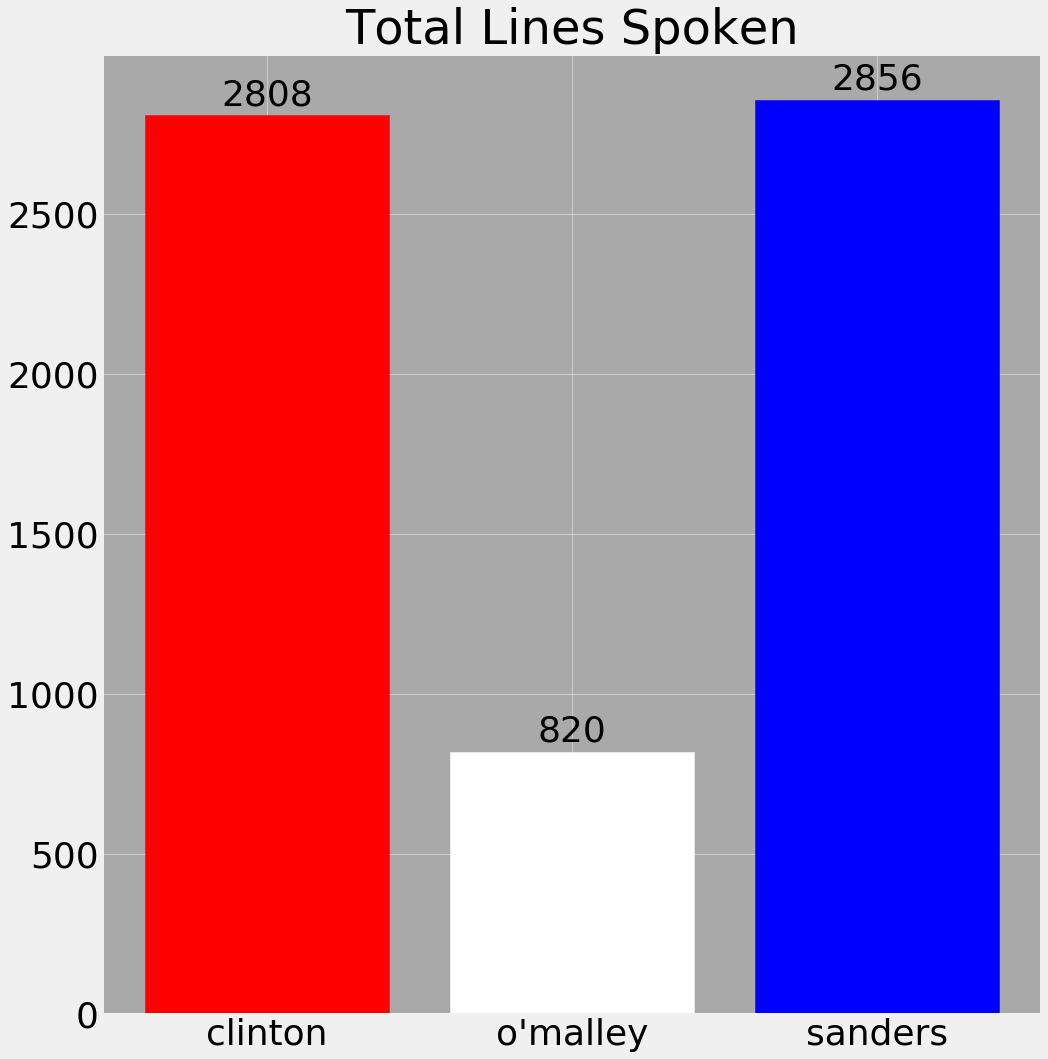

In [27]:
fig, ax = plt.subplots(figsize = (14, 14))
rects = ax.bar(x = counts.index, height = counts['tokenized'])
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 36)
autolabel(rects)
rects[0].set_color('red')
rects[1].set_color('white')
rects[2].set_color('blue')
ax.set_facecolor('darkgrey')
fig.tight_layout()
plt.xticks(fontsize = 36)
plt.yticks(fontsize = 36)
ax.set_title("Total Lines Spoken", fontsize = 48)
plt.show()

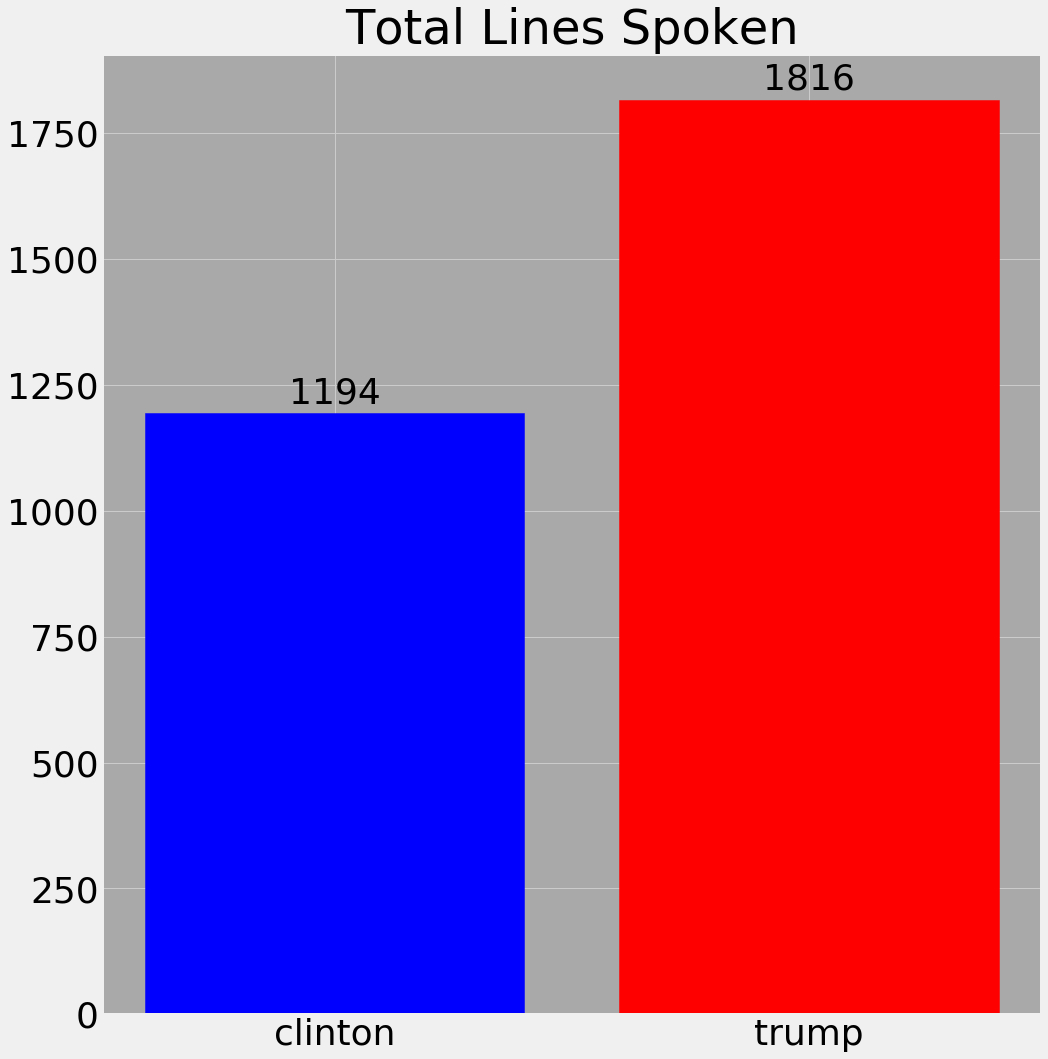

In [28]:
fig, ax = plt.subplots(figsize = (14, 14))
rects1 = ax.bar(x = pres_counts.index, height = pres_counts['tokenized'])
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 36)
autolabel(rects1)
rects1[1].set_color('r')
rects1[0].set_color('b')
ax.set_facecolor('darkgrey')
fig.tight_layout()
plt.xticks(fontsize = 36)
ax.set_title("Total Lines Spoken", fontsize = 48)
plt.yticks(fontsize = 36)
plt.show()

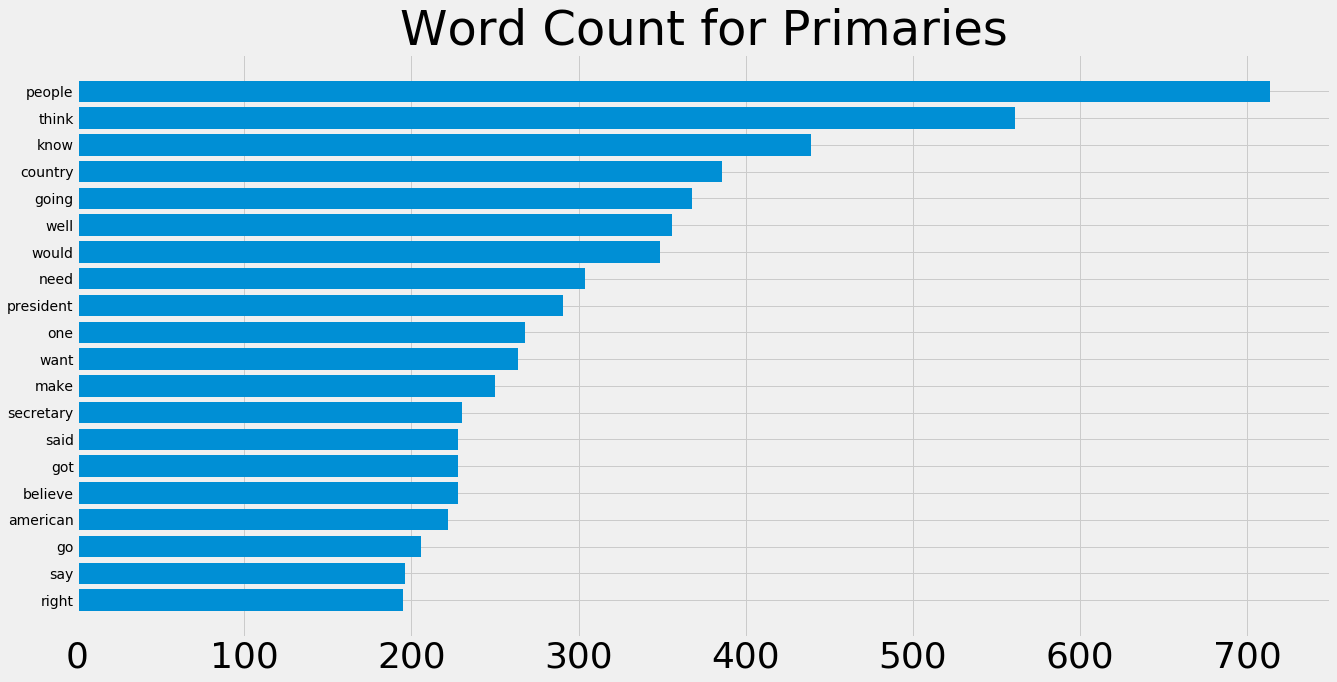

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(word_counts.index[:20], word_counts[:20])
plt.title('Word Count for Primaries', fontsize = 48)
plt.xticks(fontsize = 36)
plt.gca().invert_yaxis()

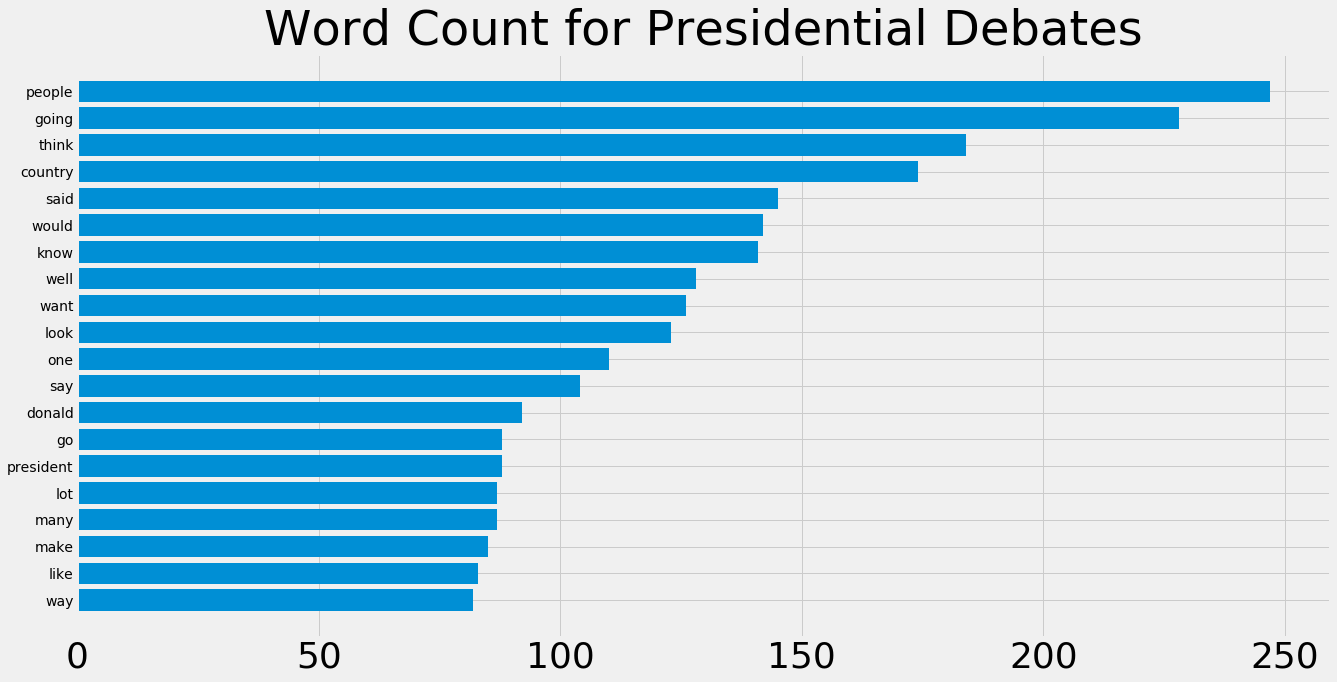

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.barh(word_counts1.index[:20], word_counts1[:20])
plt.title('Word Count for Presidential Debates', fontsize = 48)
plt.xticks(fontsize = 36)
plt.gca().invert_yaxis()

In [31]:
cheer_list = []
for i in primaries['tokenized']:
    if 'cheer' in i or 'applause' in i:
        cheer_list.append(1)
    else:
        cheer_list.append(0)
primaries['Label2'] = cheer_list

cheer_pres_list = []
for i in pres['tokenized']:
    if 'cheer' in i or 'applause' in i:
        cheer_pres_list.append(1)
    else:
        cheer_pres_list.append(0)
pres['Label2'] = cheer_pres_list

In [39]:
for i, j in enumerate(primaries['Label2']):
    if j == 1:
        if primaries['tokenized'][i] == 'applause':
            primaries['Label2'][i-1] = 1
        elif primaries['tokenized'][i] == 'cheering applause':
            primaries['Label2'][i-1] = 1
        elif primaries['tokenized'][i] == 'laughter applause':
            primaries['Label2'][i-1] = 1
        elif primaries['tokenized'][i] == 'crosstalk applause':
            primaries['Label2'][i-1] = 1
        elif primaries['tokenized'][i] == 'applause cheering':
            primaries['Label2'][i-1] = 1

/Users/kevinpark/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/kevinpark/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kevinpark/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users

In [40]:
primaries

,Speaker,Labels,tokenized,Label2
0,o'malley,0,name martin omalley former mayor baltimore for...,0
1,o'malley,0,wife katie four great kids grace tara william ...,0
2,o'malley,0,like nothing wouldnt give healthier better lives,0
3,o'malley,0,things learned better life others,0
4,o'malley,0,15 years executive experience learned effectiv...,0
...,...,...,...,...
6479,sanders,0,believe weve got overturn citizens united move...,0
6480,sanders,0,right greatest wealthiest country history worl...,0
6481,sanders,0,stand fight back lot better,0
6482,sanders,0,running president,1


In [41]:
no_applause = primaries[primaries['tokenized'] != 'applause']
no_applause = no_applause[no_applause['tokenized'] != 'cheering applause']
no_applause = no_applause[no_applause['tokenized'] != 'laughter applause']
no_applause = no_applause[no_applause['tokenized'] != 'laughter']
no_applause = no_applause[no_applause['tokenized'] != 'applause cheering']
no_applause = no_applause[no_applause['tokenized'] != 'crosstalk applause']

In [42]:
no_applause.index = range(len(no_applause))

In [43]:
no_applause

,Speaker,Labels,tokenized,Label2
0,o'malley,0,name martin omalley former mayor baltimore for...,0
1,o'malley,0,wife katie four great kids grace tara william ...,0
2,o'malley,0,like nothing wouldnt give healthier better lives,0
3,o'malley,0,things learned better life others,0
4,o'malley,0,15 years executive experience learned effectiv...,0
...,...,...,...,...
6050,sanders,0,democracy oligarchy,0
6051,sanders,0,believe weve got overturn citizens united move...,0
6052,sanders,0,right greatest wealthiest country history worl...,0
6053,sanders,0,stand fight back lot better,0


In [44]:
applause_counts = no_applause.groupby('Speaker').sum()

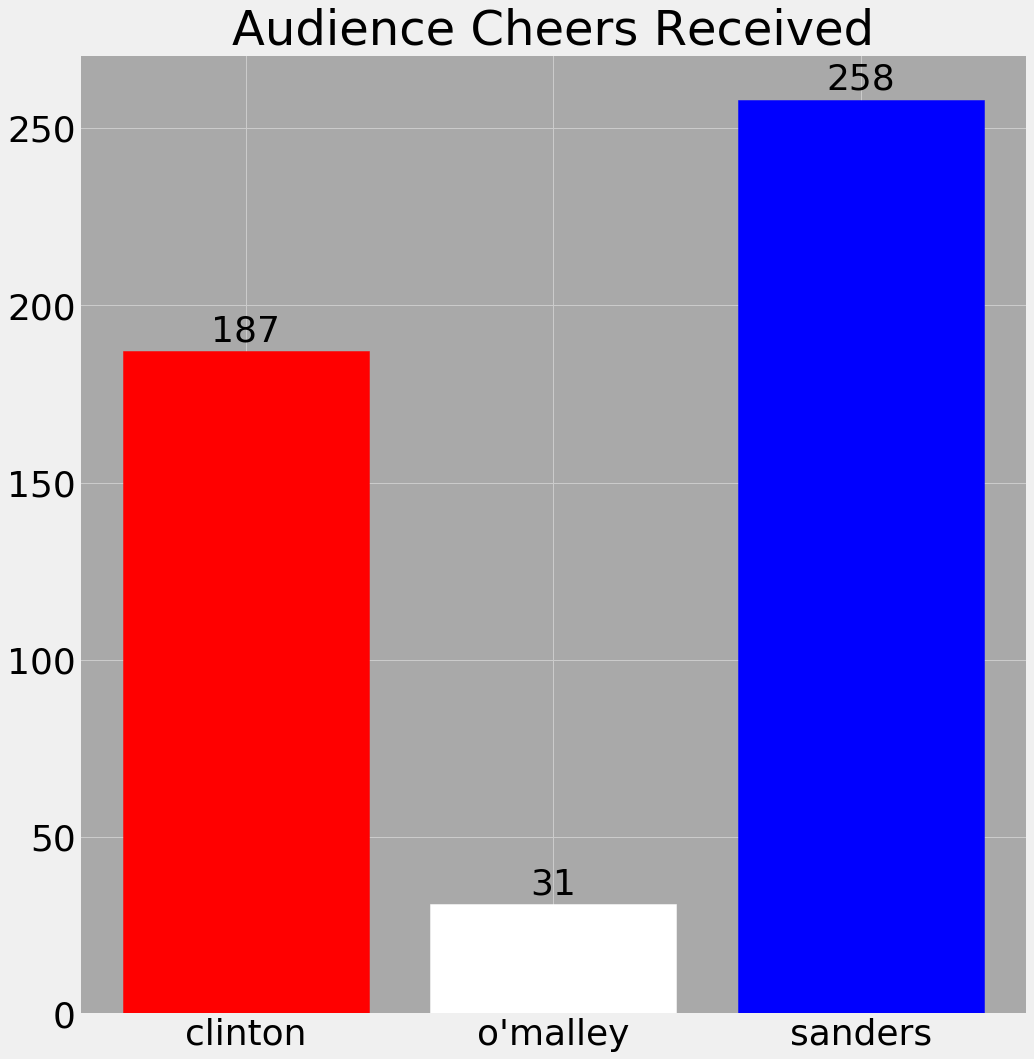

In [45]:
fig, ax = plt.subplots(figsize = (14, 14))
rects = ax.bar(applause_counts.index, applause_counts['Label2'])
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 36)
autolabel(rects)
rects[0].set_color('red')
rects[1].set_color('white')
rects[2].set_color('blue')
ax.set_facecolor('darkgrey')
fig.tight_layout()
plt.xticks(fontsize = 36)
plt.yticks(fontsize = 36)
ax.set_title("Audience Cheers Received", fontsize = 48)
plt.show()

In [47]:
no_applause.to_csv('audience', index=False)